In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.datasets import load_wine
from sklearn import preprocessing
import matplotlib.pyplot as plt 
wine = load_wine()
data=pd.DataFrame(data = np.c_[wine['data'], wine['target']], columns=wine['feature_names']+['target'])

In [109]:
y = data['target'].to_numpy()
x = data.iloc[:,:-1].to_numpy()

In [92]:
#11a LOOCV
predictions = []
cv = LeaveOneOut()
for train_ix, test_ix in cv.split(x):
    x_train, x_test = x[train_ix, :], x[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    predictions.append(yhat[0])


In [93]:
#11a confusion matrix 
actual = list(y)
confusion_matrix = []
for i in list(range(0,3)):
    array = []
    for j in list(range(0,3)):
        counter = 0
        for k in list(range(len(predictions))):
            if actual[k] == i and predictions[k] == j:
                counter = counter + 1
        array.append(counter)
    confusion_matrix.append(array)
confusion_matrix

[[52, 3, 4], [5, 54, 12], [3, 14, 31]]

In [94]:
#11a accuracy 
err_positions = np.not_equal(predictions, actual)
error = float(len(err_positions) - np.sum(err_positions))/len(actual)
error

0.7696629213483146

In [112]:
#11b kfold
accuracy_list = []
fold = []
for i in range(2,100, 5):
    kf = KFold(n_splits=i)
    neigh = KNeighborsClassifier(n_neighbors=1)
    localacc = []
    for train_ix, test_ix in kf.split(x):
        correct = 0
        x_train, x_test = x[train_ix, :], x[test_ix, :]
        y_train, y_test = y[train_ix], y[test_ix]

        neigh.fit(x_train, y_train)
        yhat = neigh.predict(x_test)
        for n in range(len(y_test)):
            if yhat[n] == y_test[n]:
                correct = correct + 1
        acc = correct/len(y_test)
        localacc.append(acc)
    fold.append(i)
    accuracy_list.append(np.mean(localacc))

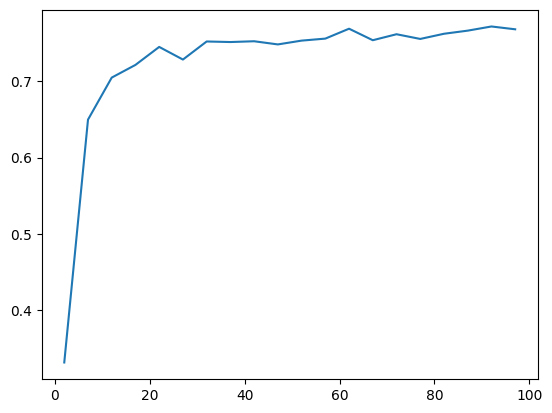

In [113]:
#11b kfold chart 
plt.plot(fold, accuracy_list)

In [125]:
#11c scale 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df = df.to_numpy()

In [126]:
#11c LOOCV 
predictions12 = []
cv = LeaveOneOut()
for train_ix, test_ix in cv.split(x):
    x_train, x_test = df[train_ix, :], df[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    predictions12.append(yhat[0])

In [127]:
#11c confusion matrix 
actual = list(y)
confusion_matrix2 = []
for i in list(range(0,3)):
    array = []
    for j in list(range(0,3)):
        counter = 0
        for k in list(range(len(predictions12))):
            if actual[k] == i and predictions12[k] == j:
                counter = counter + 1
        array.append(counter)
    confusion_matrix2.append(array)
confusion_matrix2

[[59, 0, 0], [5, 62, 4], [0, 0, 48]]

In [128]:
#11c accuracy 
err_positions = np.not_equal(predictions12, actual)
error = float(len(err_positions) - np.sum(err_positions))/len(actual)
error

0.949438202247191

C:\Users\jason\AppData\Local\Temp\ipykernel_28572\1088047693.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


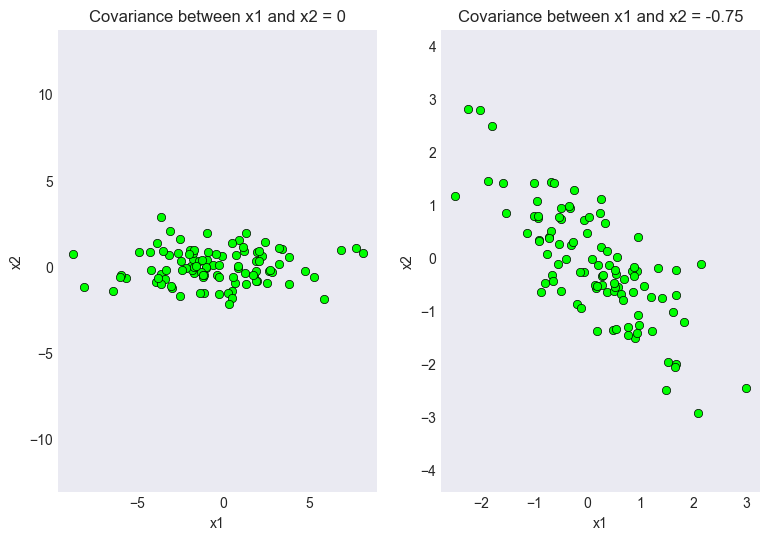

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
 
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [0, -0.75]
variances  = [[9,1], [1,1]]
 
mean = np.array([0,0])
i = 0
# Iterating over different covariance
# values
for idx, val in enumerate(cov_val):
    plt.subplot(1,3,idx+1)
     
    # Initializing the covariance matrix
    
    cov = np.array([[variances[i][0], val], [val, variances[i][1]]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating 5000 samples out of the
    # distribution
    data = distr.rvs(size = 100)
     
    # Plotting the generated samples
    plt.plot(data[:,0],data[:,1], 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
    plt.title(f'Covariance between x1 and x2 = {val}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')
    i += 1
     
plt.show()